# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/yaqiongzhang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


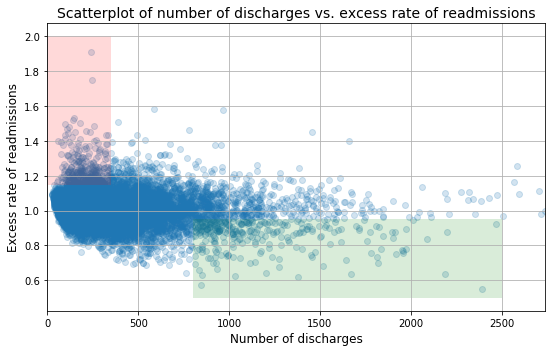

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# My turn
      
The preliminary results looks correct. But a more comprehensive analysis is needed before we come to give suggestions. For example, we can take the state of the hospital into account and we can calculate the statistic significant of the result. 

### <font color='blue'>Here is my analysis on the this question:</font>

### Definition of the question: 
1. What factors may contribute to the high hospital readmission rate?
2. What recommendation would be given to lower the hospital readmission rate?

### 1. Understand the dataset
There are 11578 rows in this dataset. Each row describe a hospital's information including: 
1. number of discharges 
2. state
3. excess readmission ratio
4. predicted readmission rate, which equals the number of readmission/number of discharge
5. expected readmission rate
6. number of readmission

In [5]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [6]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


### Look at the number of discharge and excess readmission ratio of the dataset

median number of discharges 281.0


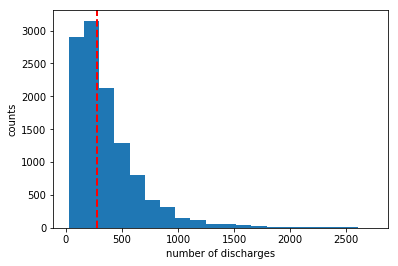

In [7]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
plt.hist(x, 20)
plt.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2)
plt.xlabel('number of discharges')
plt.ylabel('counts')
print('median number of discharges',np.median(x))

median excess rate of readmission: 1.00355


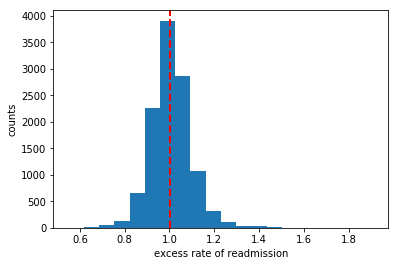

In [8]:
plt.hist(y, 20)
plt.axvline(np.median(y), color='r', linestyle='dashed', linewidth=2)
plt.xlabel('excess rate of readmission')
plt.ylabel('counts')
print('median excess rate of readmission:',np.median(y))

#### From the analysis above, we can see more than half of the hospitals have a number of discharges less than 300. So they have a much larger sample size.
### Analysis of hospitals have a number of discharge less than 300:

In [9]:
data_less = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']<=300]
data_less =data_less[81:]

In [10]:
y_less = list(data_less['Excess Readmission Ratio'])
len(y_less)

6132

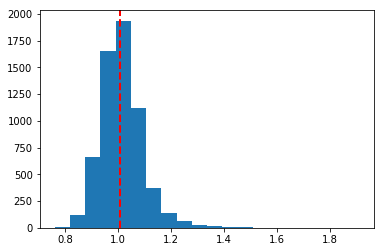

In [11]:
plt.hist(y_less, 20)
plt.axvline(np.median(y_less), color='r', linestyle='dashed', linewidth=2)

In [12]:
import scipy.stats as stats
stats.normaltest(y_less)

NormaltestResult(statistic=1979.1272286182061, pvalue=0.0)

In [13]:
stats.ttest_1samp(y_less,1)

Ttest_1sampResult(statistic=13.547967296151404, pvalue=3.1788259111080269e-41)

The t score is larger than 2.576 ($\alpha$ = .01), so we reject the null hypothesis. The mean of the ratio is larger than 1 for the hospitals with number of discharge less than 300.

### Analysis of hospitals have a number of discharge more than 1000:

In [14]:
data_more = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>1000]
data_more =data_more[:-3]

In [15]:
y_more = list(data_more['Excess Readmission Ratio'])
len(y_more)

460

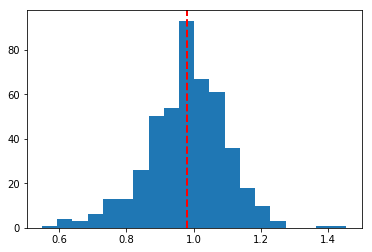

In [16]:
plt.hist(y_more, 20)
plt.axvline(np.mean(y_more), color='r', linestyle='dashed', linewidth=2)

I give the null hypothesis that the mean readmission ratio is 1.

In [17]:
import scipy.stats as stats
stats.normaltest(y_less)

NormaltestResult(statistic=1979.1272286182061, pvalue=0.0)

In [18]:
# null hypothesis is the mean of the ratio is 1.
stats.ttest_1samp(y_more,1)

Ttest_1sampResult(statistic=-3.7604084867345682, pvalue=0.00019156125444764208)

#### from the t test score, the mean of the ratio is not 1, the mean of the ratio is larger than 1.



The t score is less than -2.576 ($\alpha$ = .01), so we reject the null hypothesis. The mean of the ratio is less than 1 for the hospitals with number of discharge larger than 1000.

In the plot in the preliminary report, the scattering dots overlaps. So I compare the area of dots above than below the ratio of 1. This is not very intuitive. 

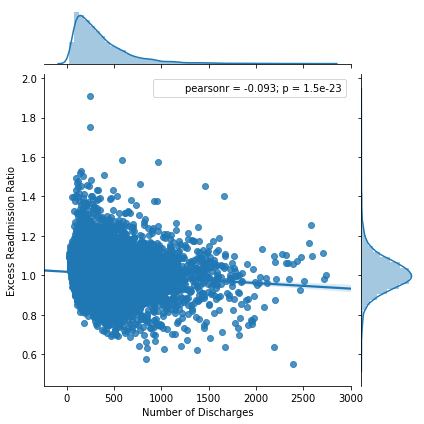

In [19]:
import seaborn as sns
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df[81:-3], kind='reg')

The above plot is inspired from a [previous work](https://github.com/kimanalytics/Hospital-Readmissions-Data-Analysis-and-Recommendations-for-Reductio/blob/master/Hospital%20Readmissions%20Data%20Analysis%20and%20Recommendations%20for%20Reduction.ipynb). And I think the linear regression line present the trend well. We can see that at the low extreme of the number of discharge, the ratio is larger than 1. And at the large extreme of the number of discharge, the ratio is less than 1.

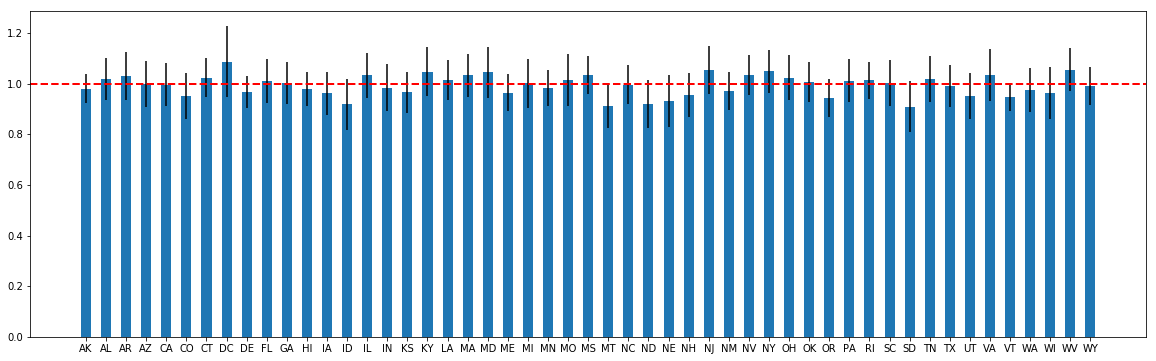

In [47]:
df_mean = clean_hospital_read_df[81:-3].groupby('State')['Excess Readmission Ratio'].mean().reset_index()
df_std = clean_hospital_read_df[81:-3].groupby('State')['Excess Readmission Ratio'].std().reset_index()

y = [a for a in df_mean['Excess Readmission Ratio']]
y_err = [b for b in df_std['Excess Readmission Ratio']]
x = [c for c in df_mean['State']]

fig,ax= plt.subplots()
ax.bar(np.arange(len(y)), y, width=0.5, yerr=y_err)

ax.set_xticks(np.arange(len(y)))
ax.set_xticklabels(x)

plt.axhline(1,color='r', linestyle='dashed',linewidth=2)
plt.rcParams['figure.figsize']={20,6}


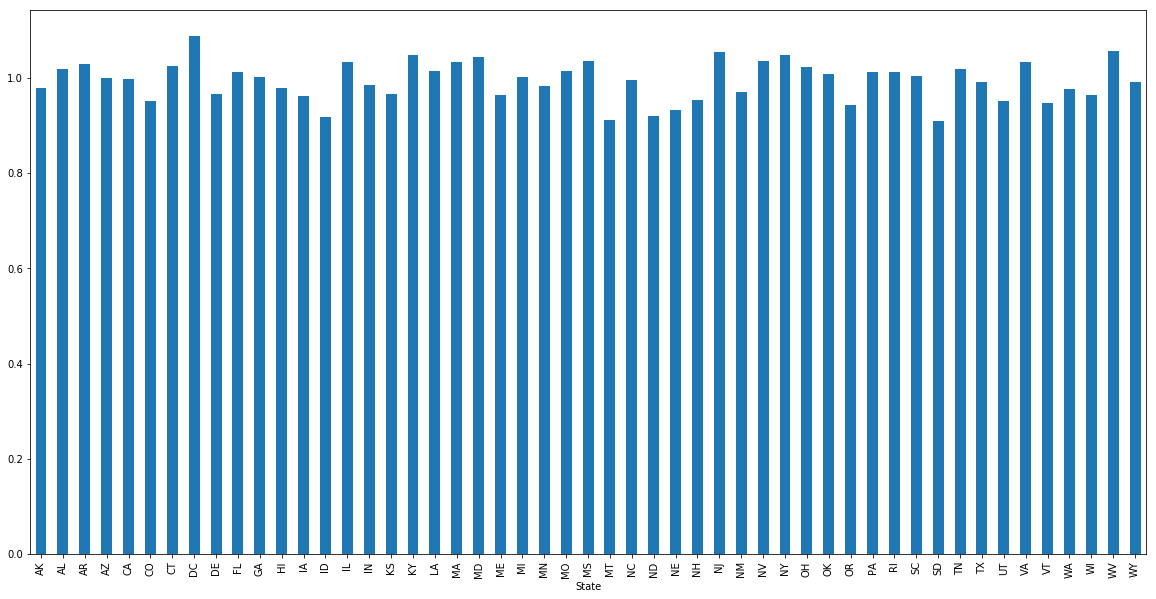

In [33]:
#https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order/36316186
df_ =clean_hospital_read_df[81:-3].groupby('State')['Excess Readmission Ratio'].mean().plot(kind='bar',figsize=[20,10])

From the above plot, we can see some state have higher excess readmission ratio. So let's take a close look at the date from State DC.

In [22]:
df_dc = clean_hospital_read_df[81:-3][clean_hospital_read_df[81:-3].State=='DC']

In [23]:
df_dc.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1373,HOWARD UNIVERSITY HOSPITAL,90003,DC,READM-30-AMI-HRRP,49,NaN,1.1089,19.2,17.3,15.0,07/01/2010,06/30/2013
1595,PROVIDENCE HOSPITAL,90006,DC,READM-30-AMI-HRRP,61,NaN,1.0995,22.3,20.3,19.0,07/01/2010,06/30/2013
2138,HOWARD UNIVERSITY HOSPITAL,90003,DC,READM-30-PN-HRRP,92,NaN,1.0820,17.7,16.4,21.0,07/01/2010,06/30/2013
5694,MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL,90004,DC,READM-30-COPD-HRRP,107,NaN,1.0145,22.3,22.0,25.0,07/01/2010,06/30/2013
5532,UNITED MEDICAL CENTER,90008,DC,READM-30-PN-HRRP,108,NaN,1.0165,20.3,20.0,23.0,07/01/2010,06/30/2013


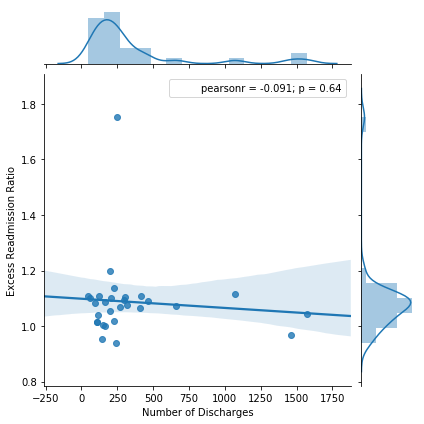

In [24]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df_dc, kind='reg')

In [25]:
df_sd = clean_hospital_read_df[81:-3][clean_hospital_read_df[81:-3].State=='SD']

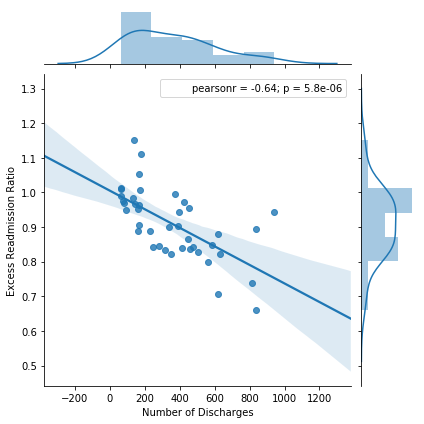

In [48]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df_sd, kind='reg')

### Conclusion
1. The excess readmission ratio varies from state to state. 
2. Overall, it's true that hospitals with lower number of discharge have higher excess readmission ratio. 

### Recommendation
In addition to the recommendation provide in the preliminary report, the variance between state should take into account. 

For example, all the hospitals in the state which has the lowest excess readmission ratio can exempt from evaluation. And on the contrary, for the hospitals in the state which has the highest excess readmission ratio should all have some evaluation.